<a href="https://colab.research.google.com/github/imcuky/deep-learning/blob/main/Simulation_of_Polynomial_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

More on <a href = "https://classic.d2l.ai/chapter_multilayer-perceptrons/underfit-overfit.html#sec-model-selection">Polynomial Regression </a>



#(A)

In [ ]:
def getData(N, sigma_squared):

    data = []

    for i in range(1, N+1):

        X = np.random.rand()

        # add the Gaussian noise term
        Y = np.cos(2 * np.pi * X) + np.random.normal(scale=np.sqrt(sigma_squared))

        data.append((X,Y))

    return data


# (B)

![](https://miro.medium.com/v2/resize:fit:946/1*wOtaeC2YkkWfj57n5kV_tg.png)

![image.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*-LydhQEDyg-4yy5hGEj5wA.png)

In [ ]:
def getMSE(predicted_Y_values, Y_values, N, w, lambda_reg, decay = False):

    mse = (np.sum((Y_values - predicted_Y_values)**2))/N

    return mse

# (C) & (F)

Calculate the gradient

By GD

![](https://miro.medium.com/v2/resize:fit:816/format:webp/1*Ih9xyUX9Uu7Wl9IwMQLo5w.gif)

In [ ]:
a = np.array([1, 2, 3])
np.vander(a, (2+1), increasing=True) # degree = 3

array([[1, 1, 1],
       [1, 2, 4],
       [1, 3, 9]])

In [ ]:
def fitData(dataset, degree, N, sigma_squared, decay=False):

  test_dataset_size=2000

  #sort the data base on x
  dataset = sorted(dataset, key=lambda tup: tup[0])
  # extract X and Y values from the training dataset
  X_values = np.array([x for x, y in dataset])
  Y_values = np.array([y for x, y in dataset])


  X_poly = np.vander(X_values, (degree+1), increasing=True)

  weights = np.random.rand(degree + 1)

  learning_rate = 0.1

  lambda_reg = 0.001

  for _ in range(2500):

      y_pred = np.dot(X_poly, weights)

      # gradient on MSE
      gradient = -2/N * np.dot(X_poly.T, (Y_values - y_pred))

      if decay == True:
        gradient_reg = 2 * lambda_reg * weights
        weights -= learning_rate * (gradient + gradient_reg)
      else:
        weights -= learning_rate * gradient

  predicted_Y_values = np.dot(X_poly, weights)
  Ein = getMSE(predicted_Y_values, Y_values, N, weights, lambda_reg, decay)


  # TEST ERROR
  test_dataset = getData(test_dataset_size, sigma_squared) # a different dataset size than the training set

  X_test = np.array([x for x, y in test_dataset])
  Y_test = np.array([y for x, y in test_dataset])

  X_test_poly = np.vander(X_test, (degree+1), increasing=True)

  test_pred_Y = np.dot(X_test_poly, weights)

  Eout = getMSE(test_pred_Y, Y_test, test_dataset_size, weights, lambda_reg, decay)


  return weights, Ein, Eout


## Test

0.038466941401824585 0.03886876379020098


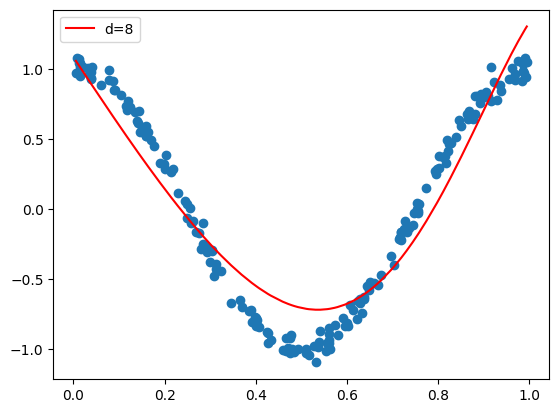

0.027362279511857022 0.02749713425679369


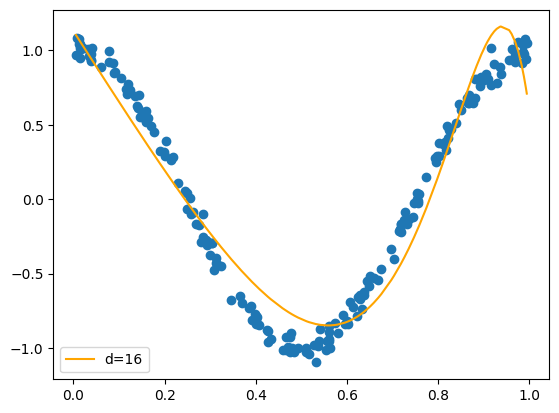

With weight decay
0.033130643518428315 0.03534395512827146


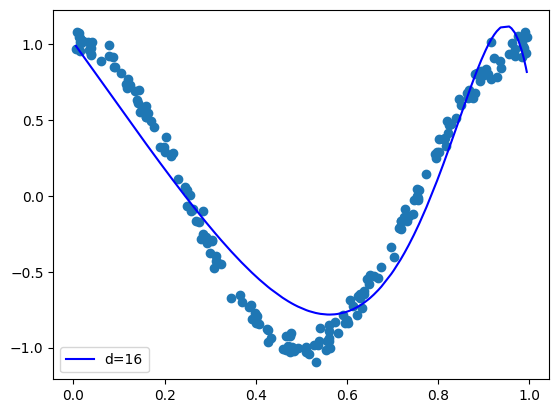

In [ ]:
N = 200
sig_s = 0.05 **2
d_1 = 8
d_2 = 16
d_3 = 16

training_dataset = getData(N, sig_s)

X_values = np.array([x for x, y in training_dataset])
Y_values = np.array([y for x, y in training_dataset])
x = np.sort(X_values)


coefficients, Ein, Eout = fitData(training_dataset, d_1, N,sig_s)
coefficients_2, Ein_2, Eout_2 = fitData(training_dataset, d_2, N,sig_s)
coefficients_3, Ein_3, Eout_3 = fitData(training_dataset, d_3, N,sig_s, decay=True)

# Testing
x_1 = np.vander(x, (d_1+1), increasing=True)
x_2 = np.vander(x, (d_2+1), increasing=True)
x_3 = np.vander(x, (d_3+1), increasing=True)

Y = np.dot(x_1, coefficients)
print(Ein, Eout)
plt.scatter(X_values, Y_values)
plt.plot(x, Y, color="red", label=f"d={d_1}")
plt.legend()
plt.show()

Y_2 = np.dot( x_2 , coefficients_2)
print(Ein_2, Eout_2)
plt.scatter(X_values, Y_values)
plt.plot(x , Y_2, color="orange", label=f"d={d_2}")
plt.legend()
plt.show()

print("With weight decay")
Y_3 = np.dot( x_3 , coefficients_3)
print(Ein_3, Eout_3)
plt.scatter(X_values, Y_values)
plt.plot(x , Y_3, color="blue", label=f"d={d_3}")
plt.legend()
plt.show()


# (D)

In [ ]:
def experiment(N, d, sigma_squared, decay=False):

    total_Ein = 0
    total_Eout = 0

    M = 50
    for _ in range(M):

      training_dataset = getData(N, sigma_squared)

      _, Ein, Eout = fitData(training_dataset, d, N, sigma_squared, decay)

      total_Ein += Ein
      total_Eout += Eout

    average_Ein = total_Ein / M
    average_Eout = total_Eout / M

    return average_Ein, average_Eout

# (E)

<ipython-input-82-17d357ae6291>:25: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * np.dot(X_poly.T, (Y_values - y_pred)) / N
<ipython-input-82-17d357ae6291>:31: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * gradient


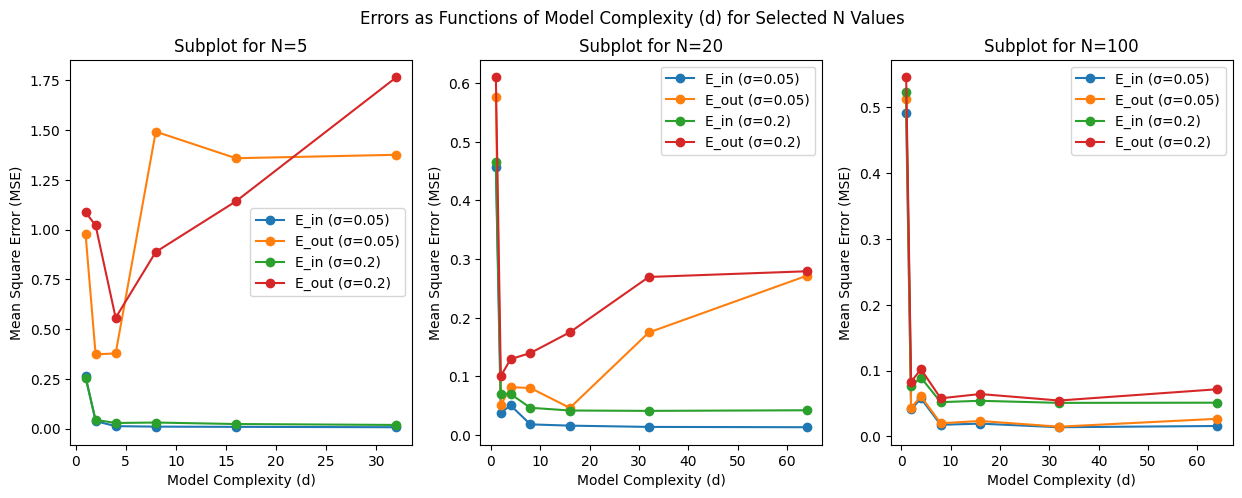

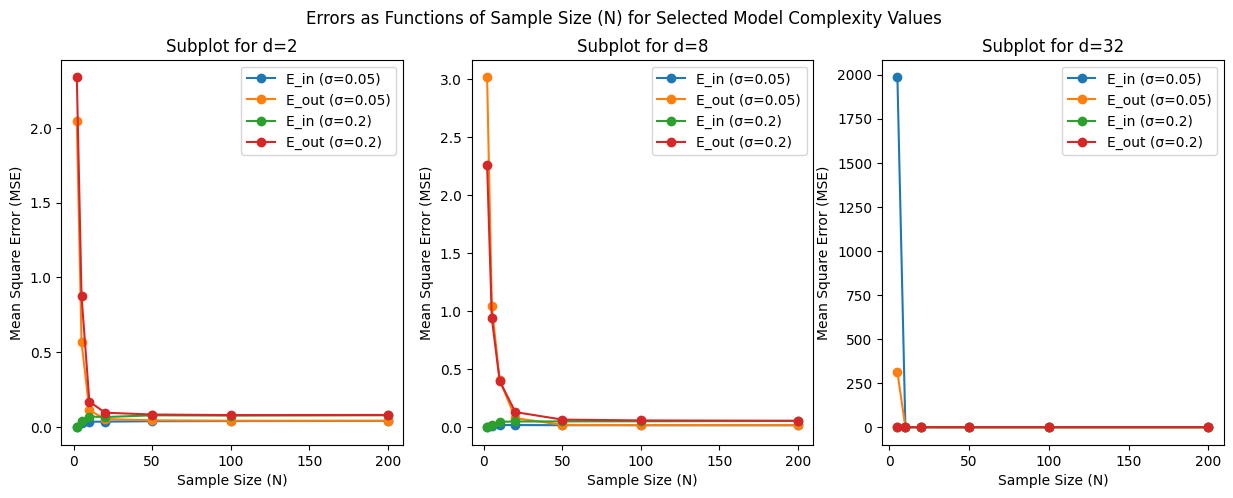

In [ ]:
N_values = [2, 5, 10, 20, 50, 100, 200]
d_values = [1, 2, 4, 8, 16, 32, 64]
sig_values = [0.05, 0.2]
sig_values = [value ** 2 for value in sig_values]


# replace with sorted(random.sample(N_values, 3)) for 3 random values of N
selected_N_values = [5, 20, 100]

# sorted(random.sample(d_values, 3))
selected_d_values = [2, 8, 32]


# Plot 1: Three values of N, plot errors as functions of d

plt.figure(figsize=(15, 5))

for N in selected_N_values:
    Ein_values_05, Eout_values_05 = [], []
    Ein_values_2, Eout_values_2 = [], []

    for d in d_values:
      # For sigma = 0.05
      Ein_05, Eout_05 = experiment(N, d, sig_values[0])
      Ein_values_05.append(Ein_05)
      Eout_values_05.append(Eout_05)

      # For sigma = 0.2
      Ein_2, Eout_2 = experiment(N, d, sig_values[1])
      Ein_values_2.append(Ein_2)
      Eout_values_2.append(Eout_2)

    plt.subplot(1, len(selected_N_values), selected_N_values.index(N) + 1)
    plt.plot(d_values, Ein_values_05, 'o-',label=f'E_in (σ=0.05)')
    plt.plot(d_values, Eout_values_05, 'o-',label=f'E_out (σ=0.05)')
    plt.plot(d_values, Ein_values_2, 'o-',label=f'E_in (σ=0.2)')
    plt.plot(d_values, Eout_values_2, 'o-',label=f'E_out (σ=0.2)')
    plt.xlabel('Model Complexity (d)')
    plt.ylabel('Mean Square Error (MSE)')
    plt.title(f'Subplot for N={N}')
    plt.legend()

plt.suptitle('Errors as Functions of Model Complexity (d) for Selected N Values')
plt.show()




# Plot 2: Three values of d, plot errors as functions of N

plt.figure(figsize=(15, 5))


for d in selected_d_values:
    Ein_values_05, Eout_values_05 = [], []
    Ein_values_2, Eout_values_2 = [], []

    for N in N_values:
        # For sigma = 0.05
        Ein_05, Eout_05 = experiment(N, d, sig_values[0])
        Ein_values_05.append(Ein_05)
        Eout_values_05.append(Eout_05)

        # For sigma = 0.2
        Ein_2, Eout_2 = experiment(N, d, sig_values[1])
        Ein_values_2.append(Ein_2)
        Eout_values_2.append(Eout_2)

    plt.subplot(1, len(selected_d_values), selected_d_values.index(d) + 1)
    plt.plot(N_values, Ein_values_05, 'o-',label=f'E_in (σ=0.05)')
    plt.plot(N_values, Eout_values_05, 'o-',label=f'E_out (σ=0.05)')
    plt.plot(N_values, Ein_values_2, 'o-',label=f'E_in (σ=0.2)')
    plt.plot(N_values, Eout_values_2, 'o-',label=f'E_out (σ=0.2)')
    plt.title(f'Subplot for d={d}')
    plt.xlabel('Sample Size (N)')
    plt.ylabel('Mean Square Error (MSE)')
    plt.legend()

plt.suptitle('Errors as Functions of Sample Size (N) for Selected Model Complexity Values')
plt.show()




---

1. High variances -> high error
2. Number of training samples effect the errors more than the degrees
3. Low error for high degrees
4. For a fixed degree, the model struggles with a high test error (overfitting) for a low sample size
5. For a fixed sample size, the model struggles with a high training and testing error (underfitting) for small sample size, but as the model gets more complex the errors tend to decrease
6. Sample size effect more on the model performance than the degree

# (F)

<ipython-input-82-17d357ae6291>:25: RuntimeWarning: overflow encountered in multiply
  gradient = -2 * np.dot(X_poly.T, (Y_values - y_pred)) / N
<ipython-input-82-17d357ae6291>:29: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * (gradient + gradient_reg)
<ipython-input-79-0695d1d0468a>:6: RuntimeWarning: overflow encountered in square
  mse = (np.sum((Y_values - predicted_Y_values)**2))/N + lambda_reg * np.dot(w, w)
<ipython-input-79-0695d1d0468a>:4: RuntimeWarning: overflow encountered in square
  mse = (np.sum((Y_values - predicted_Y_values)**2))/N


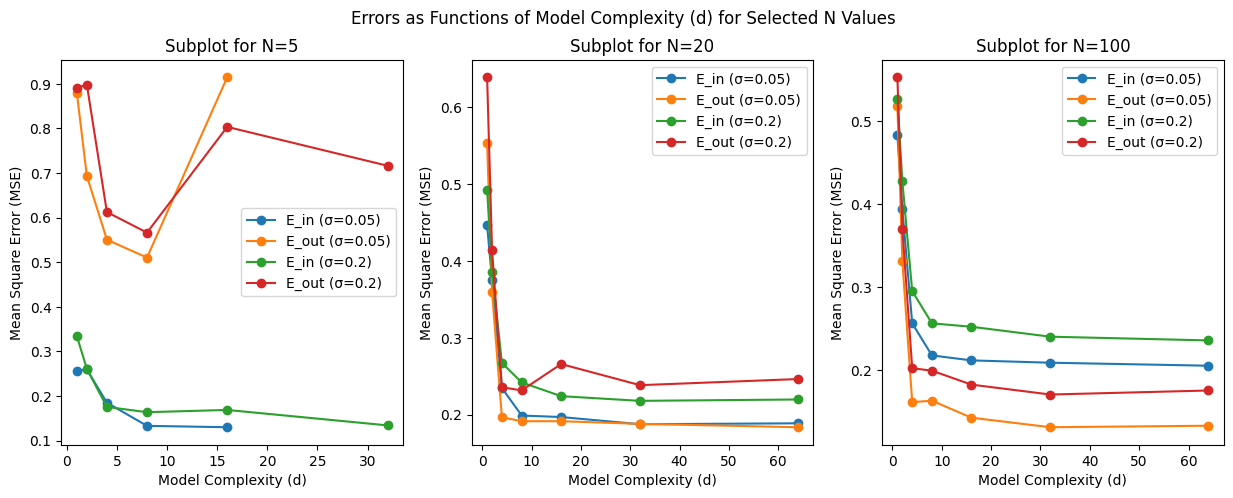

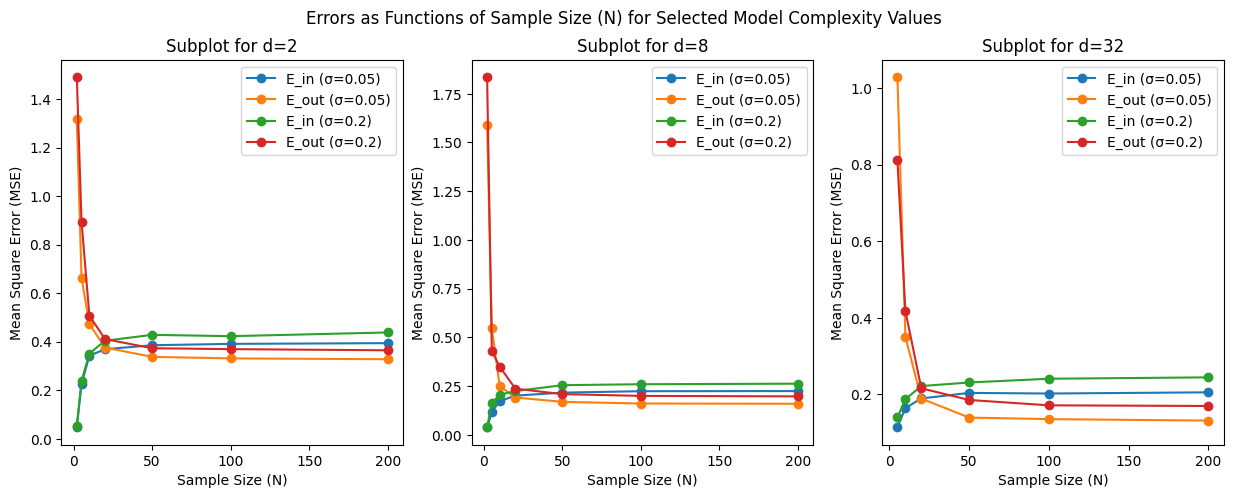

In [ ]:
N_values = [2, 5, 10, 20, 50, 100, 200]
d_values = [1, 2, 4, 8, 16, 32, 64]
sig_values = [0.05, 0.2]
sig_values = [value ** 2 for value in sig_values]


# replace with sorted(random.sample(N_values, 3)) for 3 random values of N
selected_N_values = [5, 20, 100]

# sorted(random.sample(d_values, 3))
selected_d_values = [2, 8, 32]


# Plot 1: Three values of N, plot errors as functions of d

plt.figure(figsize=(15, 5))

for N in selected_N_values:
    Ein_values_05, Eout_values_05 = [], []
    Ein_values_2, Eout_values_2 = [], []

    for d in d_values:
      # For sigma = 0.05
      Ein_05, Eout_05 = experiment(N, d, sig_values[0], decay=True)
      Ein_values_05.append(Ein_05)
      Eout_values_05.append(Eout_05)

      # For sigma = 0.2
      Ein_2, Eout_2 = experiment(N, d, sig_values[1], decay=True)
      Ein_values_2.append(Ein_2)
      Eout_values_2.append(Eout_2)

    plt.subplot(1, len(selected_N_values), selected_N_values.index(N) + 1)
    plt.plot(d_values, Ein_values_05, 'o-',label=f'E_in (σ=0.05)')
    plt.plot(d_values, Eout_values_05, 'o-',label=f'E_out (σ=0.05)')
    plt.plot(d_values, Ein_values_2, 'o-',label=f'E_in (σ=0.2)')
    plt.plot(d_values, Eout_values_2, 'o-',label=f'E_out (σ=0.2)')
    plt.xlabel('Model Complexity (d)')
    plt.ylabel('Mean Square Error (MSE)')
    plt.title(f'Subplot for N={N}')
    plt.legend()

plt.suptitle('Errors as Functions of Model Complexity (d) for Selected N Values')
plt.show()




# Plot 2: Three values of d, plot errors as functions of N

plt.figure(figsize=(15, 5))


for d in selected_d_values:
    Ein_values_05, Eout_values_05 = [], []
    Ein_values_2, Eout_values_2 = [], []

    for N in N_values:
        # For sigma = 0.05
        Ein_05, Eout_05 = experiment(N, d, sig_values[0], decay=True)
        Ein_values_05.append(Ein_05)
        Eout_values_05.append(Eout_05)

        # For sigma = 0.2
        Ein_2, Eout_2 = experiment(N, d, sig_values[1], decay=True)
        Ein_values_2.append(Ein_2)
        Eout_values_2.append(Eout_2)

    plt.subplot(1, len(selected_d_values), selected_d_values.index(d) + 1)
    plt.plot(N_values, Ein_values_05, 'o-',label=f'E_in (σ=0.05)')
    plt.plot(N_values, Eout_values_05, 'o-',label=f'E_out (σ=0.05)')
    plt.plot(N_values, Ein_values_2, 'o-',label=f'E_in (σ=0.2)')
    plt.plot(N_values, Eout_values_2, 'o-',label=f'E_out (σ=0.2)')
    plt.title(f'Subplot for d={d}')
    plt.xlabel('Sample Size (N)')
    plt.ylabel('Mean Square Error (MSE)')
    plt.legend()

plt.suptitle('Errors as Functions of Sample Size (N) for Selected Model Complexity Values')
plt.show()
